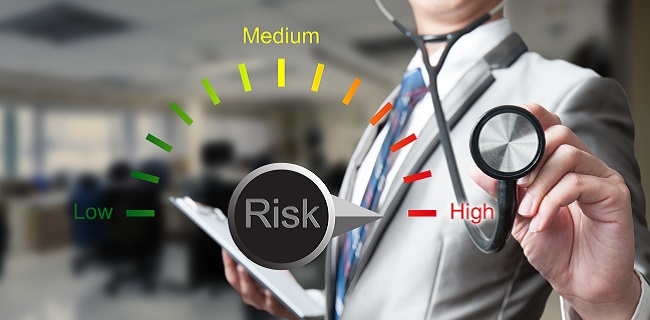

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 


# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.preprocessing import StandardScaler
from keras.layers.advanced_activations import ReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten,Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
import keras
import cv2
import tensorflow
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix





# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Dataset = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')


In [ ]:
Dataset.head()

In [ ]:
Dataset.info()

In [ ]:
Dataset.shape

# Check Missing Data

In [ ]:
display(Dataset.isnull().sum())


In [ ]:
Dataset.isnull().sum().plot(kind='bar',color = 'pink')
plt.title("Missing Data ")
plt.show()

# Visulization

In [ ]:
display(Dataset.DEATH_EVENT.value_counts())


In [ ]:
plt.figure(figsize=(10,8))


sns.countplot(x='DEATH_EVENT', data=Dataset , palette='pink');


### there survived are 203 and not survived are 96


In [ ]:
sns.pairplot(Dataset, hue="DEATH_EVENT")


In [ ]:
male_survived = Dataset[Dataset["sex"]==1]
female_survived = Dataset[Dataset["sex"]==0]
male_sur= male_survived[male_survived["DEATH_EVENT"]==0]
female_sur= female_survived[female_survived["DEATH_EVENT"]==0]



labels = ['Male_Survived','Male_Not Survived', "Female_Survived", "Female_Not Survived"]


In [ ]:

values = [len(male_survived[Dataset["DEATH_EVENT"]==0]),len(male_survived[Dataset["DEATH_EVENT"]==1]),
         len(female_survived[Dataset["DEATH_EVENT"]==0]),len(female_survived[Dataset["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_layout(
    title_text = "gender Case :"
)
fig.show()

# Correlation

In [ ]:

plt.subplots(figsize=(11, 11)) 
sns.heatmap(Dataset.corr(),annot=True)

# Preprocessing for Data

### Normalize Data

In [ ]:
minmax_scaler = MinMaxScaler()

Dataset_normal = pd.DataFrame(minmax_scaler.fit_transform(Dataset), columns = Dataset.columns)

Dataset_normal

In [ ]:
X = Dataset_normal.loc[:, Dataset_normal.columns != 'DEATH_EVENT']
y =Dataset_normal['DEATH_EVENT']

# Split data

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

# Build Model

### SVM

In [ ]:
model = SVC(kernel='rbf',random_state=1,C=1, gamma = 0.1)


### fit Model

In [ ]:
model.fit(X_train,y_train)


### predict model

In [ ]:
y_pred = model.predict(X_test)


# Accurcy

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))


In [ ]:
Conv = confusion_matrix(y_test,y_pred)
Conv

### KNN

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)


##### Fit Model

In [ ]:
classifier.fit(X_train,y_train)



#### predict Model

In [ ]:
y_pred = classifier.predict(X_test)

#### Accuracy

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)
